In [1]:
# Libraries and data

In [2]:
%cd /home/mitchb/Development/Projects/_Study/Business Analyst course/Statistics and Descriptive Analytics/Linear Regression

/home/mitchb/Development/Projects/_Study/Business Analyst course/Statistics and Descriptive Analytics/Linear Regression


/home/mitchb/Development/Projects/_Study/Business Analyst course/venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
# libraries
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# load the data
df = pd.read_csv("diamond.csv")
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


# Data preparation

In [7]:
# isolate X and Y
y = df.price
X = df.carat
X, y

(0      0.30
 1      0.30
 2      0.30
 3      0.30
 4      0.31
        ... 
 303    1.01
 304    1.02
 305    1.06
 306    1.02
 307    1.09
 Name: carat, Length: 308, dtype: float64,
 0       1302
 1       1510
 2       1510
 3       1260
 4       1641
        ...  
 303     8175
 304    10796
 305     9890
 306     8959
 307     9107
 Name: price, Length: 308, dtype: int64)

## Adding constant

This is needed specifically for statsmodels package, in order to add a constant term to the linear equation it is fitting. It is not adding a constant to the values.

It's the difference between fitting a line `y = mx` to your data vs fitting `y = mx + b`

If it is not included, model will be fit using `b = 0` instead of calculating what b is in the model.`

In [8]:
# add constant to x
X = sm.add_constant(X)
X.head()

,const,carat
0,1.0,0.30
1,1.0,0.30
2,1.0,0.30
3,1.0,0.30
4,1.0,0.31


# Linear regression

In [10]:
# Regression model
model1 = sm.OLS(endog=y, exog=X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     2541.
Date:                Wed, 24 Jan 2024   Prob (F-statistic):          3.04e-150
Time:                        06:32:57   Log-Likelihood:                -2597.9
No. Observations:                 308   AIC:                             5200.
Df Residuals:                     306   BIC:                             5207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2298.3576    158.531    -14.498      0.0

Text(0, 0.5, 'Price')

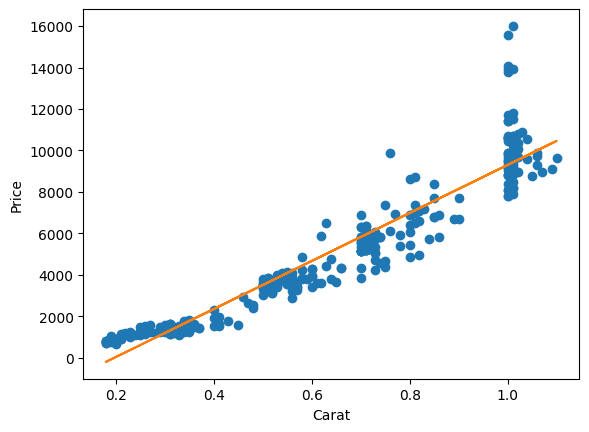

In [14]:
# plotting
X = df.carat
plt.plot(X, y, 'o')
b, a = np.polyfit(X, y, 1)
plt.plot(X, b*X+a)
plt.xlabel("Carat")
plt.ylabel("Price")

# Linear regression with dummy variable

In [15]:
# look at carat variable
df.carat.describe()

count    308.000000
mean       0.630909
std        0.277183
min        0.180000
25%        0.350000
50%        0.620000
75%        0.850000
max        1.100000
Name: carat, dtype: float64

In [16]:
# create binary variable
df["carat_binary"] = np.where(df.carat > 0.6, 1, 0)
df.head()

,Unnamed: 0,carat,colour,clarity,certification,price,carat_binary
0,1,0.30,D,VS2,GIA,1302,0
1,2,0.30,E,VS1,GIA,1510,0
2,3,0.30,G,VVS1,GIA,1510,0
3,4,0.30,G,VS1,GIA,1260,0
4,5,0.31,D,VS1,GIA,1641,0


In [17]:
X = df.carat_binary
y = df.price

In [20]:
X = sm.add_constant(X)
X.head()

,const,carat_binary
0,1.0,0
1,1.0,0
2,1.0,0
3,1.0,0
4,1.0,0


In [21]:
model2 = sm.OLS(endog=y, exog=X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     591.5
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           1.79e-73
Time:                        06:45:06   Log-Likelihood:                -2775.6
No. Observations:                 308   AIC:                             5555.
Df Residuals:                     306   BIC:                             5563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2225.2303    161.442     13.783   

Text(0, 0.5, 'Price')

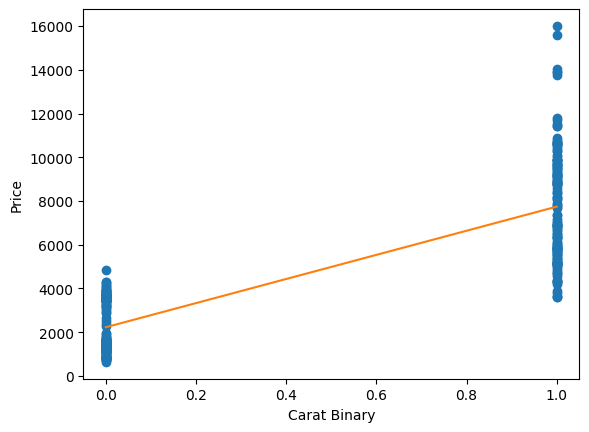

In [23]:
X = df.carat_binary
plt.plot(X, y, 'o')
b, a = np.polyfit(X, y, 1)
plt.plot(X, b*X+a)
plt.xlabel("Carat Binary")
plt.ylabel("Price")
